# **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [3]:
df = sns.load_dataset('titanic')

# **Data Overview**

In [4]:
df.head() #first 5 rows in dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info() # display data types and null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape # total data rows and columns

(891, 15)

# Identifying and handling Missing Values

In [8]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
df['age'] = df['age'].fillna(df['age'].median()) #fill missing age vals with median

df = df.dropna(subset=['embark_town']) # drop missing embark_town rows

df = df.dropna(subset=['embarked']) # drop missinf embarked rows

df.drop(columns='deck', inplace=True) #dropping column since a very high number of data is missing and can cause noise/outliers

In [13]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 # creating a new feature 'family_size' including the person ( +1)

In [12]:
print(df[['sibsp', 'parch', 'family_size']].head())

   sibsp  parch  family_size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


# **Total Survival Count**

survived
0    549
1    340
Name: count, dtype: int64


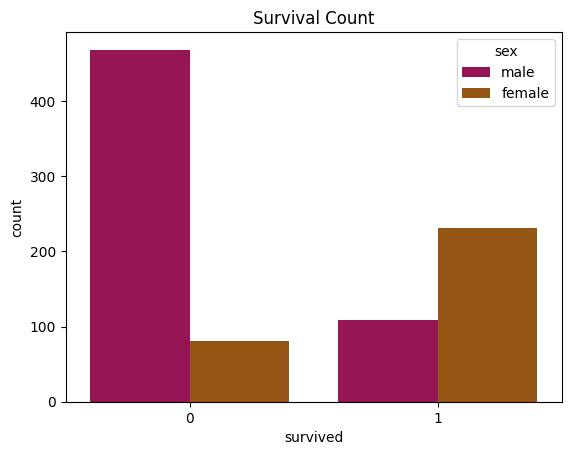

In [20]:
survival_count = df['survived'].value_counts()
print(survival_count) # 0 = didn't survive, 1 = survived

#plotting
sns.countplot(data=df, x='survived', palette='brg', hue = 'sex')
plt.title('Survival Count')
plt.show()

# **Passenger Class Distribution**

pclass
3    491
1    214
2    184
Name: count, dtype: int64


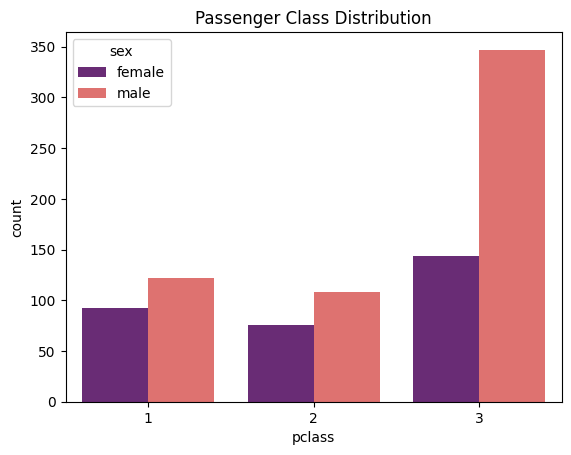

In [21]:
class_count = df['pclass'].value_counts()
print(class_count) # number of passages in each class 1st, 2nd, 3rd

sns.countplot(data=df, x='pclass', palette='magma', hue = 'sex')
plt.title('Passenger Class Distribution')
plt.show()

# **Survival By Gender**

survived    0    1
sex               
female     81  231
male      468  109


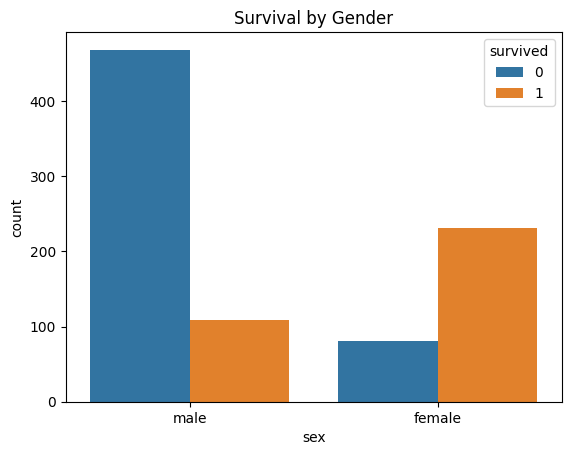

In [22]:
# survival counts split by gender (male and female).
survival_by_gender = df.groupby('sex')['survived'].value_counts().unstack()
print(survival_by_gender)

sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()

survived    0    1
pclass            
1          80  134
2          97   87
3         372  119


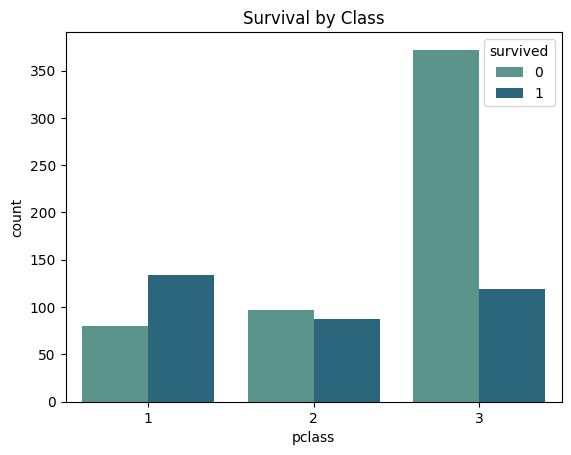

In [24]:
# survival counts for each class, split between those who survived and those who didn’t.
survival_by_class = df.groupby('pclass')['survived'].value_counts().unstack()
print(survival_by_class)

sns.countplot(data=df, x='pclass', hue='survived', palette='crest')
plt.title('Survival by Class')
plt.show()

# **Age vs Survival**

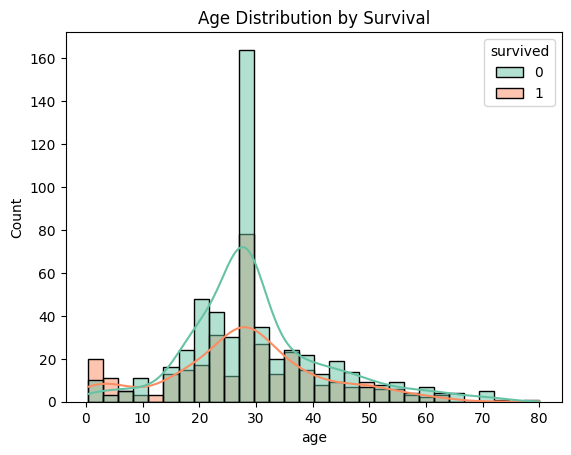

In [32]:
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Survival')
plt.show()

# **Family Size vs Survival**

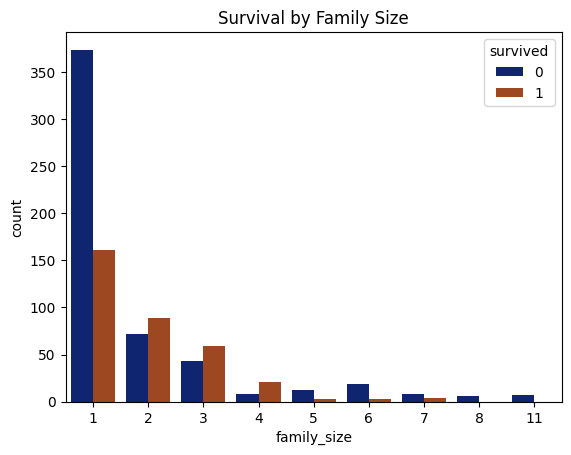

In [34]:
sns.countplot(data=df, x='family_size', hue='survived', palette='dark')
plt.title('Survival by Family Size')
plt.show()

# **Correlation Matrix**

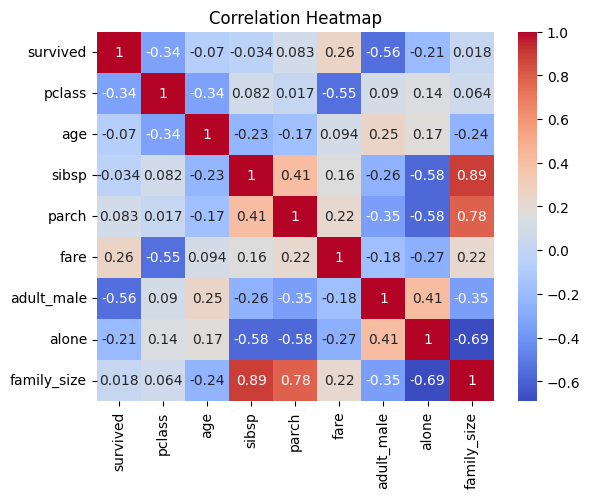

In [35]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# mean survival rate (proportion of survivors) by both passenger class and gender.
survival_by_class_gender = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()
print(survival_by_class_gender)

sex       female      male
pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [38]:
# mean survival rate based on different family sizes.
survival_by_family_size = df.groupby('family_size')['survived'].mean()
print(survival_by_family_size)

family_size
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64
